### Imports + Loading Data:

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import ast

In [ ]:
BERT_bank_df = pd.read_csv("BERT_bank.csv")
BERT_bank_df = BERT_bank_df.drop(BERT_bank_df.columns[0], axis=1)
BERT_bank_df["All Predictions"] = BERT_bank_df["All Predictions"].apply(ast.literal_eval)

In [ ]:
out_of_topic_manual = pd.read_csv("out_of_topic.csv")
errors_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"])]
out_of_topic_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned topic name"] != BERT_bank_df["Cluster topic name"])]
in_topic_raw = BERT_bank_df[(BERT_bank_df["Assigned label"] != BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned topic name"] == BERT_bank_df["Cluster topic name"])]

errors_raw.dropna(inplace=True)
in_topic_raw.dropna(inplace=True)
out_of_topic_raw.dropna(inplace=True)

In [ ]:
print("Total Number of Errors where predicted != cluster:",len(errors_raw),"\n")
print("Number of Out of Topic Errors where predicted != cluster:",len(out_of_topic_raw),"\n")
print("Number of In Topic Errors where predicted != cluster:",len(in_topic_raw))

Total Number of Errors where predicted != cluster: 212 

Number of Out of Topic Errors where predicted != cluster: 83 

Number of In Topic Errors where predicted != cluster: 129


### Out of Topic Errors:

In [109]:
out_of_topic_df = pd.read_csv("out_of_topic_final.csv")

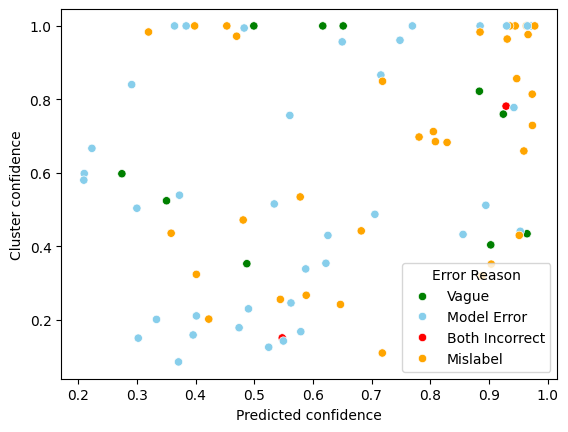

In [110]:
error_reason_palette = {"Mislabel": "orange", "Model Error": "skyblue", "Vague": "green","Both Incorrect": "red"}

sns.scatterplot(data=out_of_topic_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette = error_reason_palette)
plt.legend(title="Error Reason")
plt.show()

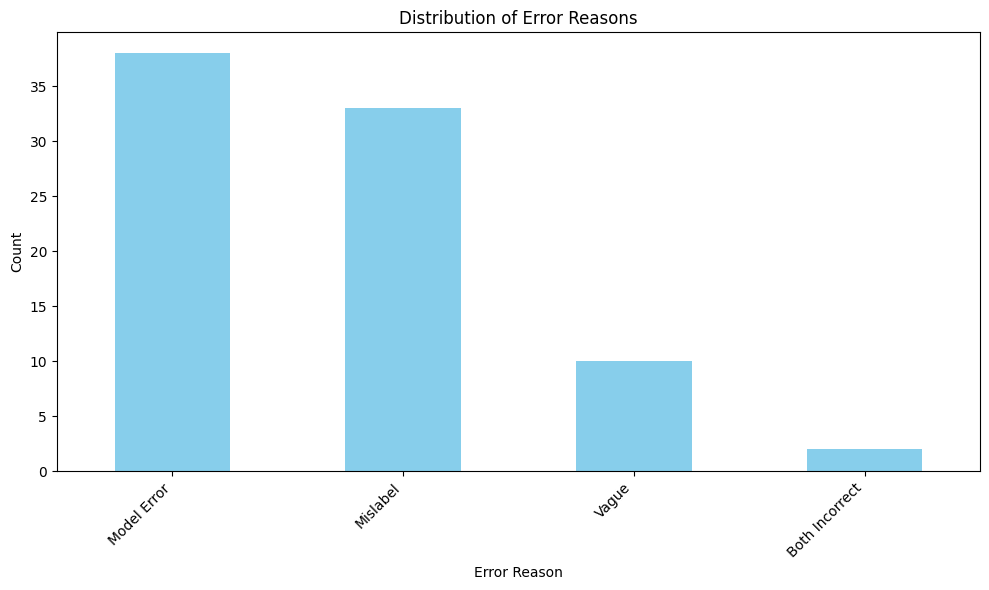

In [111]:
error_counts_out = out_of_topic_df['Error Reason'].value_counts()

plt.figure(figsize=(10, 6))
error_counts_out.plot(kind='bar', color='skyblue')
plt.title('Distribution of Error Reasons')
plt.xlabel('Error Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [112]:
error_counts_out = out_of_topic_df['Error Reason'].value_counts()
error_counts_out

Model Error       38
Mislabel          33
Vague             10
Both Incorrect     2
Name: Error Reason, dtype: int64

In [125]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

mislabels_out = out_of_topic_df[out_of_topic_df['Error Reason'] == "Mislabel"].copy()
mislabels_out['cluster_bins'] = pd.cut(mislabels_out['Cluster confidence'], bins)
mislabel_bins_out = mislabels_out['cluster_bins'].value_counts(sort=False)


model_error_out = out_of_topic_df[out_of_topic_df['Error Reason'] == "Model Error"].copy()
model_error_out['cluster_bins'] = pd.cut(model_error_out['Cluster confidence'], bins)
model_error_bins_out = model_error_out['cluster_bins'].value_counts(sort=False)

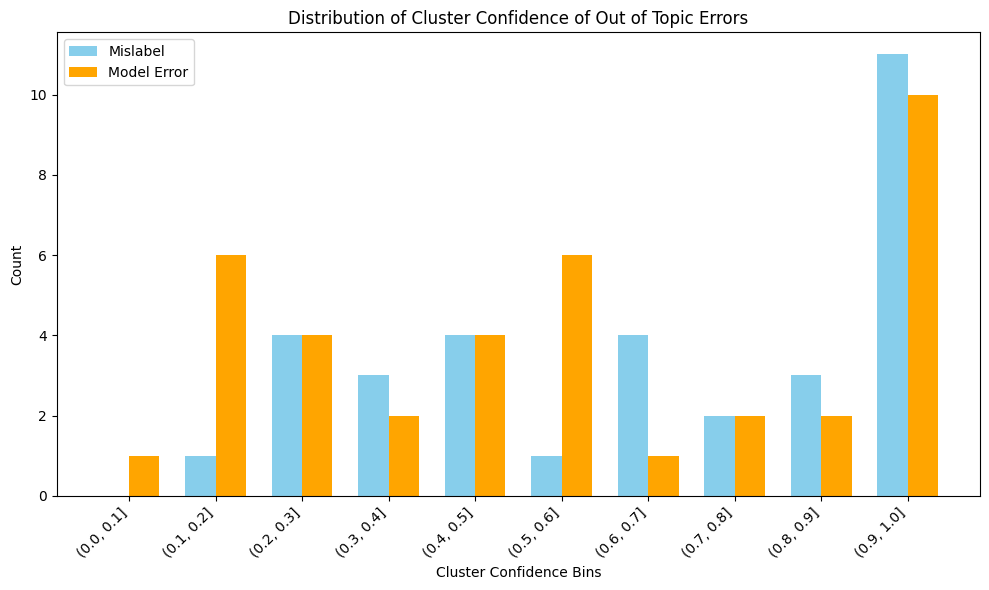

In [124]:
bar_width = 0.35
index = range(len(mislabel_bins_out))
plt.figure(figsize=(10, 6))
plt.bar(index, mislabel_bins_out, bar_width, color='skyblue', label='Mislabel')
plt.bar([i + bar_width for i in index], model_error_bins_out, bar_width, color='orange', label='Model Error')

plt.title('Distribution of Cluster Confidence of Out of Topic Errors')
plt.xlabel('Cluster Confidence Bins')
plt.ylabel('Count')
plt.xticks([i + bar_width / 2 for i in index], [str(bin) for bin in mislabel_bins_out.index], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### In Topic Errors:

In [83]:
within_topic_df = pd.read_csv("in_topic_final.csv")
within_topic_df.loc[40, "Error Reason"] = "Both Incorrect"

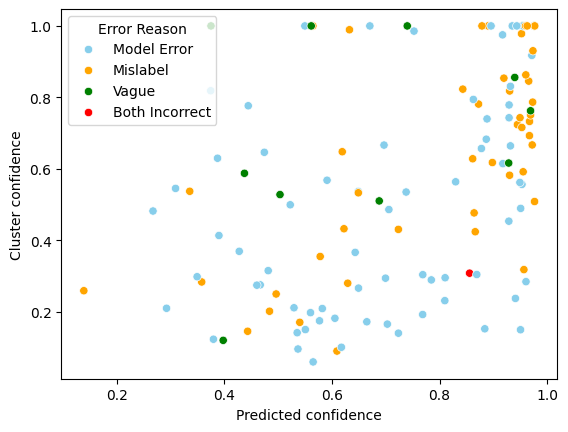

In [97]:
sns.scatterplot(data=within_topic_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_reason_palette)
plt.legend(title="Error Reason")
plt.show()

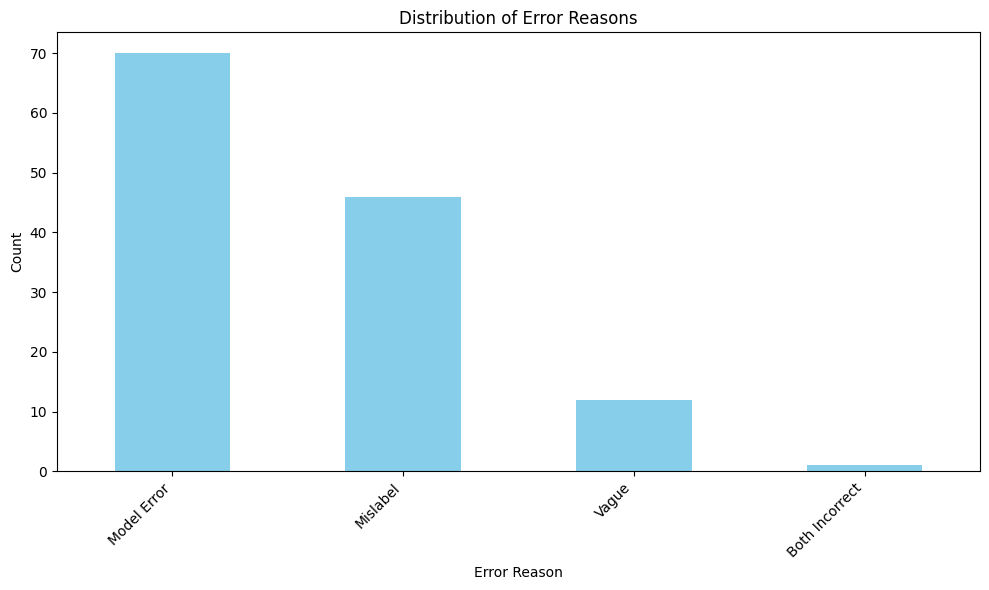

In [84]:
error_counts_in = within_topic_df['Error Reason'].value_counts()

plt.figure(figsize=(10, 6))
error_counts_in.plot(kind='bar', color='skyblue')
plt.title('Distribution of Error Reasons')
plt.xlabel('Error Reason')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [85]:
error_counts_in = within_topic_df['Error Reason'].value_counts()
error_counts_in

Model Error       70
Mislabel          46
Vague             12
Both Incorrect     1
Name: Error Reason, dtype: int64

In [121]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

mislabels_in = within_topic_df[within_topic_df['Error Reason'] == "Mislabel"].copy()
mislabels_in['cluster_bins'] = pd.cut(mislabels_in['Cluster confidence'], bins)
mislabel_bins_in = mislabels_in['cluster_bins'].value_counts(sort=False)

model_error_in = within_topic_df[within_topic_df['Error Reason'] == "Model Error"].copy()
model_error_in['cluster_bins'] = pd.cut(model_error_in['Cluster confidence'], bins)
model_error_bins_in = model_error_in['cluster_bins'].value_counts(sort=False)

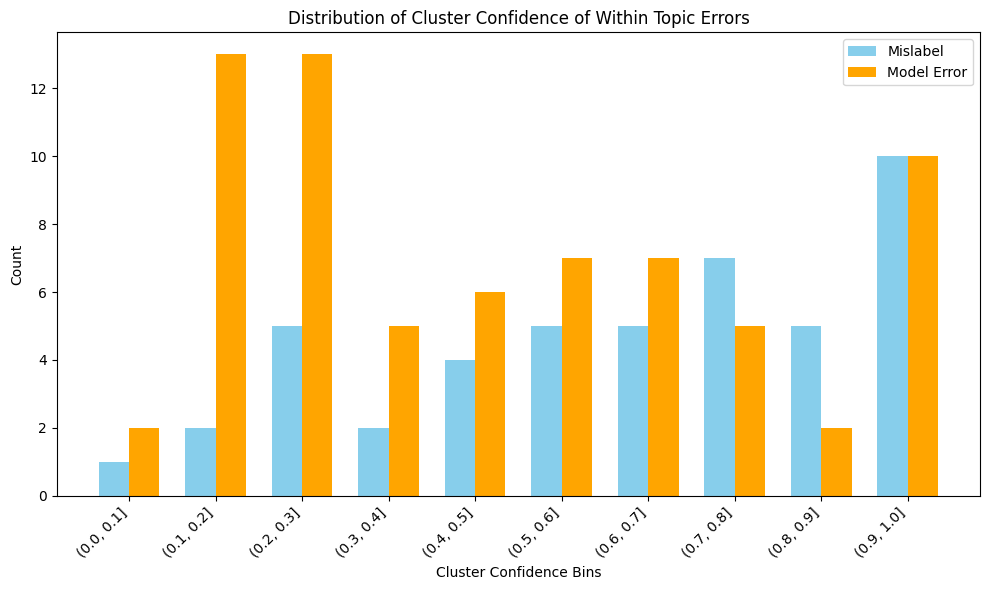

In [122]:
bar_width = 0.35
index = range(len(mislabel_bins_in))
plt.figure(figsize=(10, 6))
plt.bar(index, mislabel_bins_in, bar_width, color='skyblue', label='Mislabel')
plt.bar([i + bar_width for i in index], model_error_bins_in, bar_width, color='orange', label='Model Error')

plt.title('Distribution of Cluster Confidence of Within Topic Errors')
plt.xlabel('Cluster Confidence Bins')
plt.ylabel('Count')
plt.xticks([i + bar_width / 2 for i in index], [str(bin) for bin in mislabel_bins_in.index], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

### All Errors:

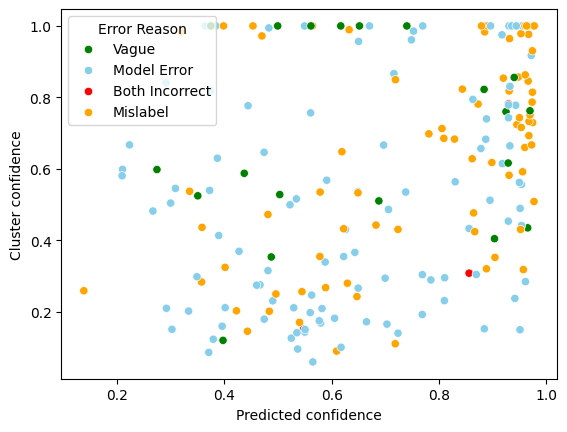

In [115]:
all_errors_df = pd.concat([out_of_topic_df, within_topic_df], ignore_index=True)

sns.scatterplot(data=all_errors_df, x="Predicted confidence", y="Cluster confidence", hue="Error Reason", palette=error_reason_palette)
plt.legend(title="Error Reason")
plt.show()

### Correct Classifications:

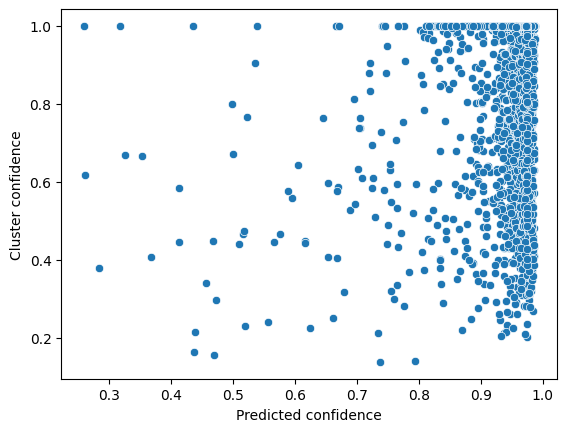

In [118]:
non_errors_df = BERT_bank_df[(BERT_bank_df["Assigned label"] == BERT_bank_df["Cluster label"]) & (BERT_bank_df["Assigned label"] == BERT_bank_df["Predicted label"]) ]

sns.scatterplot(data=non_errors_df, x="Predicted confidence", y="Cluster confidence")
plt.show()